In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as msno

# Opening the csv file and reading it.

In [2]:
Data=pd.read_csv("C:\Datasets\playstore-analysis.csv")
Data.head() #limiting to 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Describing the data

In [3]:
Data.describe() #Describing the data

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# Tasks


# 1. Data clean up – Missing value treatment



In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
Data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


# Analyzing missing value using Bar-Graph

<AxesSubplot:>

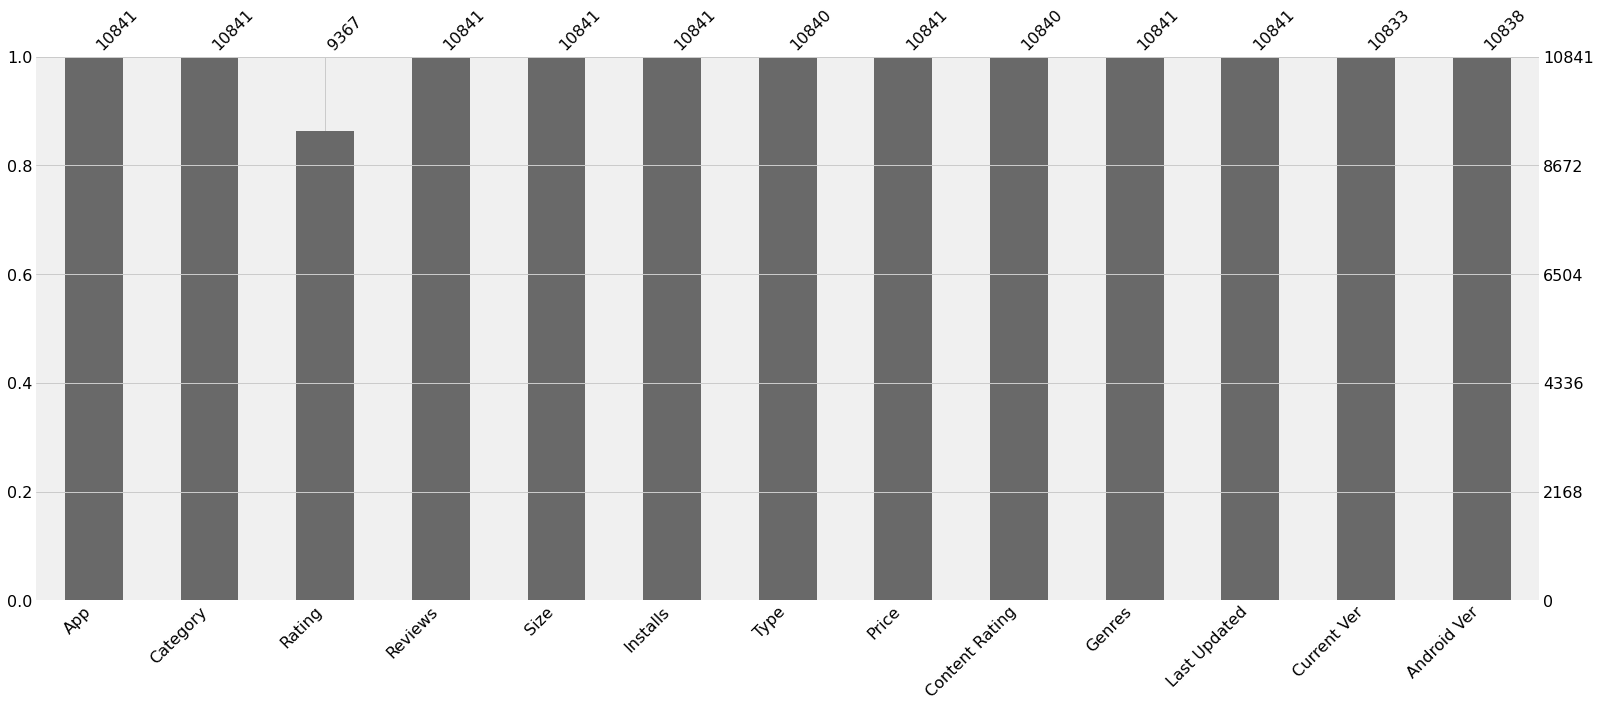

In [6]:
msno.bar(Data)

# a. Drop records where rating is missing since rating is our target/study variable

In [7]:
Data.dropna(axis="rows",how = "any", subset = ["Rating"],inplace=True)

# b. Check the null values for the Android Ver column.

In [8]:
Data["Android Ver"].isna().sum() #No of missing values

3

In [9]:
Data.loc[Data["Android Ver"].isnull()] #Location of the missing values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# i. Are all 3 records having the same problem?


In [10]:
#Yes, all the 3 records are having the same problems,i.e is they are null values

# ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [11]:
Data.drop([10472],inplace=True)

# iii. Replace remaining missing values with the mode

In [12]:
Data["Content Rating"].fillna(Data["Content Rating"].mode()[0],inplace=True)

In [13]:
Data["Android Ver"].fillna(Data["Android Ver"].mode()[0],inplace=True)

In [14]:
Data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

# c. Current ver – replace with most common value

In [15]:
Data["Current Ver"].fillna(Data["Current Ver"].mode()[0],inplace=True) 
#Filling the missing values with the most occuring value i.e mode.

# 2. Data clean up – correcting the data types


In [16]:
Data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# a. Which all variables need to be brought to numeric types?

In [17]:
# Reviews and Price need to be brought to numeric types.

# b. Price variable – remove $ sign and convert to float


In [18]:
Data['Price'] = Data.Price.str.replace("$","")
Data['Price'] = Data.Price.str.replace("0.0","0")
Data['Price'] = Data['Price'].astype(float)
Data['Price'].dtype

dtype('float64')

# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer


In [19]:
Data['Installs'] = Data.Installs.str.replace(",","")
Data['Installs'] = Data.Installs.str.replace("+","")
Data['Installs'] = Data['Installs'].astype(int)
Data['Installs'].dtype

dtype('int32')

# d. Convert all other identified columns to numeric


In [20]:
Data["Last Updated"]= pd.to_datetime(Data['Last Updated'])
Data["Reviews"]=Data["Reviews"].astype(float)
Data['Rating']=Data["Rating"].astype(float)

In [21]:
Data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 3. Sanity checks – check for the following and handle accordingly


# a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.
#i. Are there any such records? Drop if so.


In [22]:
Data["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [23]:
Data=Data[(Data.Rating>1) &(Data.Rating<5)]
#No there are no such records with rating less than 1 and greater than 5

# b. Reviews should not be more than installs as only those who installed can review the app.
# i. Are there any such records? Drop if so.

In [24]:
Data.loc[Data['Reviews']>Data['Installs']]
# Yes there is one such record.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device


# Dropping the records where Reviews is more than installs

In [25]:
Data.drop([4663],inplace=True)

# 4. Identify and handle outliers –
a. Price column

# i. Make suitable plot to identify outliers in price

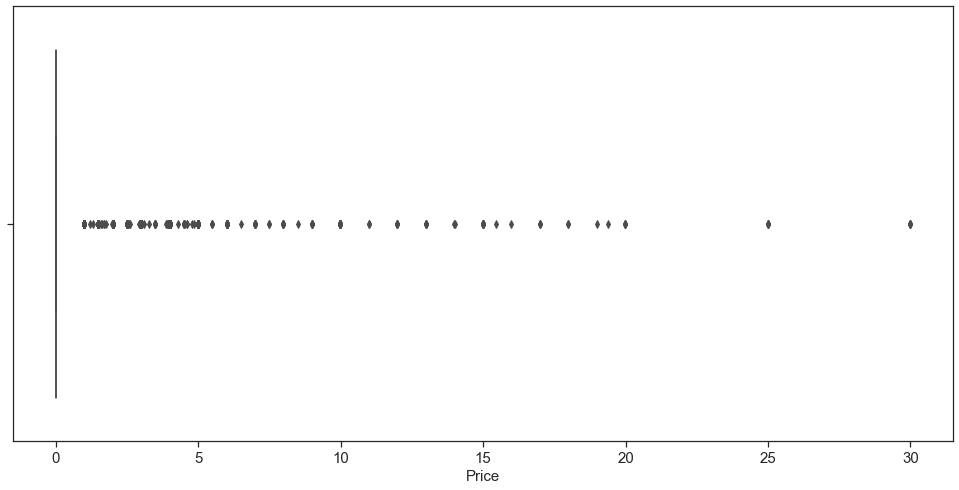

In [66]:
sns.boxplot(Data["Price"])
plt.rcParams['figure.figsize'] = (20,8)
plt.xlabel("Price",fontsize=(15))
plt.xticks(fontsize=(15))
plt.show()

# ii. Do you expect apps on the play store to cost $200? Check out these cases


In [27]:
(Data["Price"]>200).value_counts()
#Yes we can expect apps on the play store to cost $200.
#There are 15 apps whoese prices are above $200 

False    9060
True       15
Name: Price, dtype: int64

In [28]:
Data.loc[Data["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000,Paid,4000.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


# iv. Limit data to records with price < $30


In [29]:
Price_30=Data[Data["Price"]>30].index 
Data.drop(Price_30,inplace=True)
Price_30

Int64Index([2248, 2253, 2301, 2365, 2380, 2402, 2414, 4197, 4362, 4367, 5351,
            5354, 5355, 5356, 5357, 5358, 5359, 5360, 5362, 5364, 5366, 5369,
            5373, 8077],
           dtype='int64')

In [30]:
Count=Data["Price"]>30
Count
Count.value_counts()  #There are no more apps with price greater than $30

False    9051
Name: Price, dtype: int64

# iii. After dropping the useless records, make the suitable plot again to identify outliers

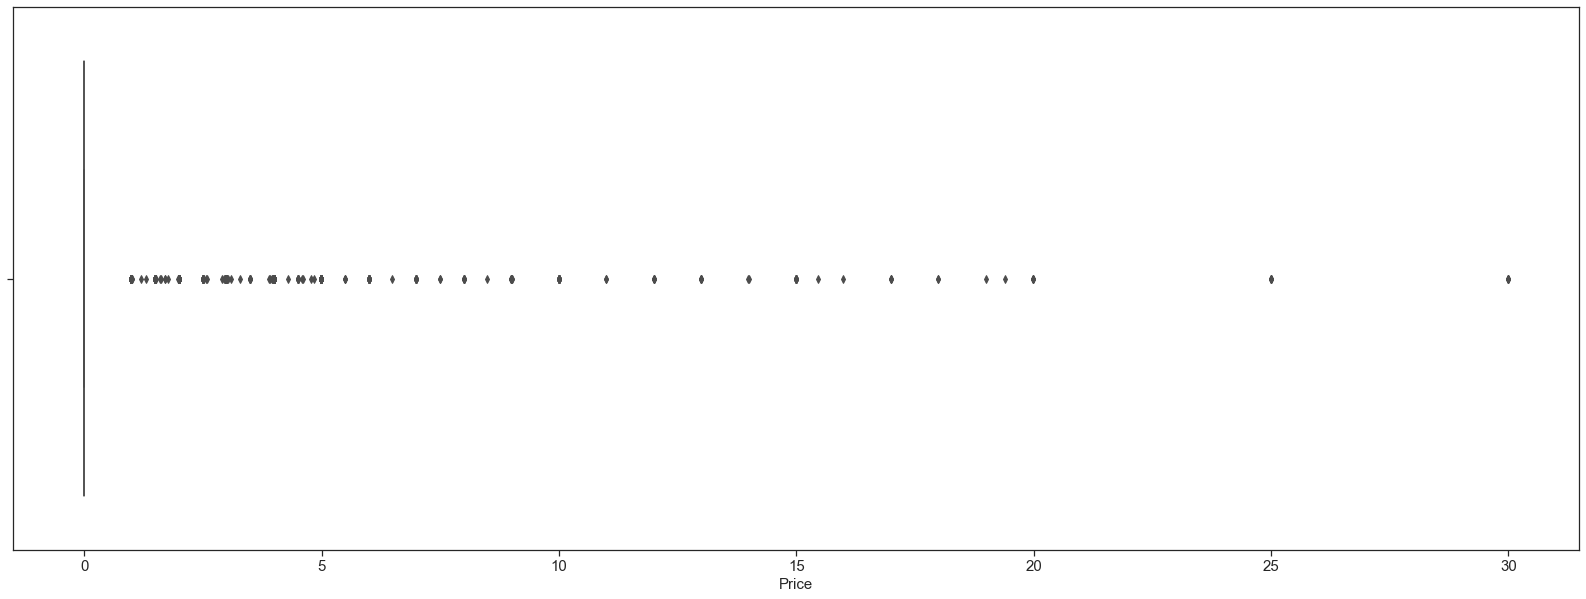

In [65]:
sns.boxplot(Data["Price"])
plt.rcParams['figure.figsize'] = (15,8)
plt.xlabel("Price",fontsize=(15))
plt.xticks(fontsize=(15))
plt.show()

# b. Reviews column
i. Make suitable plot


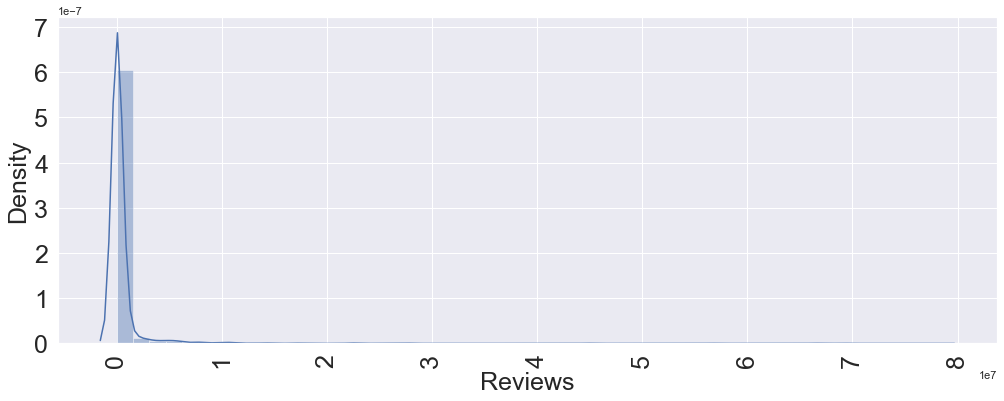

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))
plt.xticks(rotation=90,fontsize=(25))
plt.xlabel("Reviews",fontsize=(25))
plt.ylabel('Density',fontsize=(25))
plt.yticks(fontsize=(25))
sns.distplot(Data["Reviews"])
plt.show()

# ii. Limit data to apps with < 1 Million reviews


In [33]:
Data_limit=Data[Data["Reviews"]>100000].index #Data with reviews more than 1million

In [34]:
 Data.drop(Data_limit,inplace=True) #Dropping Data with reviews more than 1million

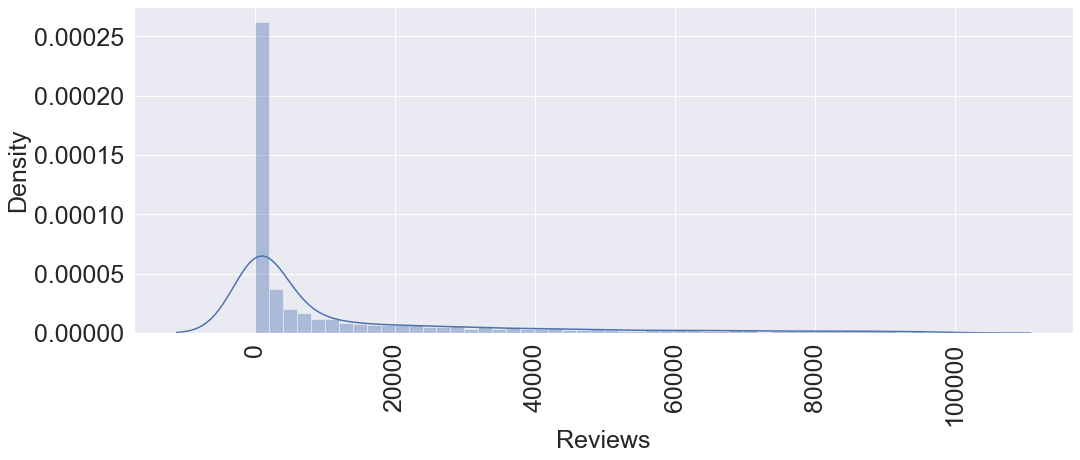

In [35]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))
plt.xticks(rotation=90,fontsize=(25))
plt.xlabel("Reviews",fontsize=(25))
plt.ylabel("Density",fontsize=(25))
plt.yticks(fontsize=(25))
sns.distplot(Data["Reviews"])
plt.show()

# c. Installs
i. What is the 95th percentile of the installs?


In [36]:
Percentile=Data.Installs.quantile(0.95) #95th percentile of Installs
print("The 95th percentile of installs is {}".format(Percentile))

The 95th percentile of installs is 5000000.0


# ii. Drop records having a value more than the 95th percentile

In [37]:
Data_drop=Data[Data["Installs"]>Percentile].index #Records having value more than 95th percentile

In [38]:
Data.drop(labels=Data_drop,inplace=True) # Dropping Records having value more than 95th percentile

# Data analysis to answer business questions


# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
 

# a. How do you explain this?


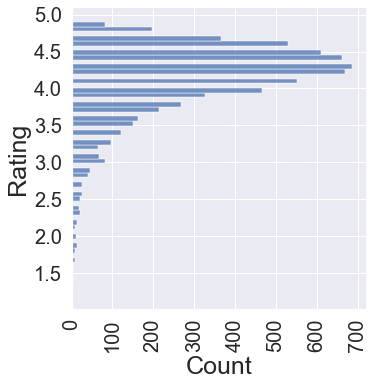

In [39]:
sns.set_style("darkgrid")
sns.displot(y=Data["Rating"])
plt.rcParams['figure.figsize'] = (25,10)
plt.xticks(rotation=90,fontsize=(20))
plt.xlabel("Count",fontsize=(25))
plt.ylabel("Rating",fontsize=(25))
plt.yticks(fontsize=(20))
plt.show()

In [40]:
Data["Rating"].skew() #The skewnewss is -1.5904172346895507

-1.5526561922147415

# b. What is the implication of this on your analysis?

In [41]:
# We can say that the distribution of rating is negatively skewed.Therefore it skewed more towards lower values.

# 6. What are the top Content Rating values?
a. Are there any values with very few records?
b. If yes, drop those as they won’t help in the analysis

In [42]:
(Data['Content Rating']).value_counts() 

Everyone           5459
Teen                647
Mature 17+          311
Everyone 10+        216
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [43]:
# Yes,Adults only 18+ ,unrated  are the records having very few values.
Data=Data[Data['Content Rating']!="Unrated"]
Data=Data[Data['Content Rating']!="Adults only 18+"] # Dropping Adults only 18+ and unrated as they have very few records.

In [44]:
(Data['Content Rating']).value_counts() 

Everyone        5459
Teen             647
Mature 17+       311
Everyone 10+     216
Name: Content Rating, dtype: int64

# 7. Effect of size on rating
a. Make a joinplot to understand the effect of size on rating


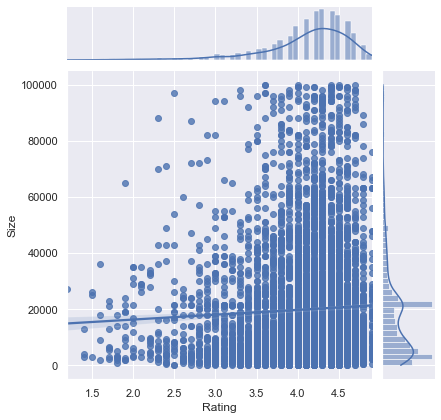

In [45]:
sns.jointplot(x="Rating",y="Size",data=Data,kind="reg")
plt.xticks(rotation=90,fontsize=(20))
plt.xlabel("Rating",fontsize=(25))
plt.ylabel("Size",fontsize=(25))
plt.yticks(fontsize=(20))
plt.show()

# b. Do you see any patterns?


In [46]:
# Yes, we can see a pattern between size and Rating i.e their is a co-relation between them

# c. How do you explain the pattern?

In [47]:
# The greater the size of the app the more is the rating,But this is not always true.


# 8. Effect of price on rating
a. Make a jointplot (with regression line)


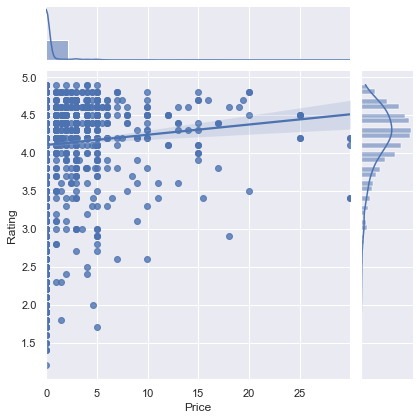

In [48]:
sns.jointplot(x="Price",y="Rating",data=Data , kind="reg")
plt.xticks(fontsize=(20))
plt.xlabel("Price",fontsize=(25))
plt.ylabel("Rating",fontsize=(25))
plt.yticks(fontsize=(20))
plt.show()

# b. What pattern do you see?


In [49]:
Data.Rating.mean()
# We can observe that there is higher rating at lower prices of the apps , 
# but with the increase of price of the apps the avg rating is 4.1

4.109859791949348

# c. How do you explain the pattern?


In [50]:
Data.corr()
# we can observe that with increase in price of the apps,the average rating remains is above 4,
# Therefore we can conclude that there is a weak relation between Rating and price.

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.179223,0.046511,0.064923,0.047967
Reviews,0.179223,1.000000,0.169911,0.692771,-0.073402
Size,0.046511,0.169911,1.000000,0.119851,0.004184
Installs,0.064923,0.692771,0.119851,1.000000,-0.099647
Price,0.047967,-0.073402,0.004184,-0.099647,1.000000


# d. Replot the data, this time with only records with price > 0


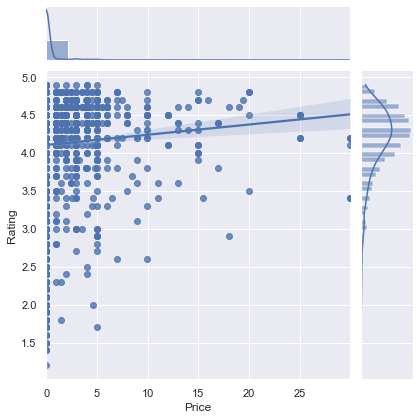

In [51]:
data=Data.loc[Data["Price"]>0]
sns.jointplot(x="Price",y="Rating",data=Data,kind='reg')

# e. Does the pattern change?


In [52]:
Data.corr()
# Yes the overall pattern changed very slightly ,
# Therefore we can say that there is a negatively weak co-relation between price and rating

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.179223,0.046511,0.064923,0.047967
Reviews,0.179223,1.000000,0.169911,0.692771,-0.073402
Size,0.046511,0.169911,1.000000,0.119851,0.004184
Installs,0.064923,0.692771,0.119851,1.000000,-0.099647
Price,0.047967,-0.073402,0.004184,-0.099647,1.000000


# f. What is your overall inference on the effect of price on the rating

In [53]:
# Increasing the price of the apps does not affect much on the rating,i.e Rating is high and it remains constant .
#The average rating of the apps is 4.1
# There is a weak relation between price and rating

# 9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'


In [54]:
from ipywidgets import interactive
def size_widget(height=5,aspect=1):
    sns.pairplot(Data,vars=['Reviews', 'Size', 'Rating', 'Price'],height=height,aspect=aspect)
plt.show()

In [55]:
interactive(size_widget,height=(1,3.5,0.5),aspect=(0.5,3,0.25))

interactive(children=(FloatSlider(value=3.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

# 10. Rating vs. content rating
a. Make a bar plot displaying the rating for each content rating


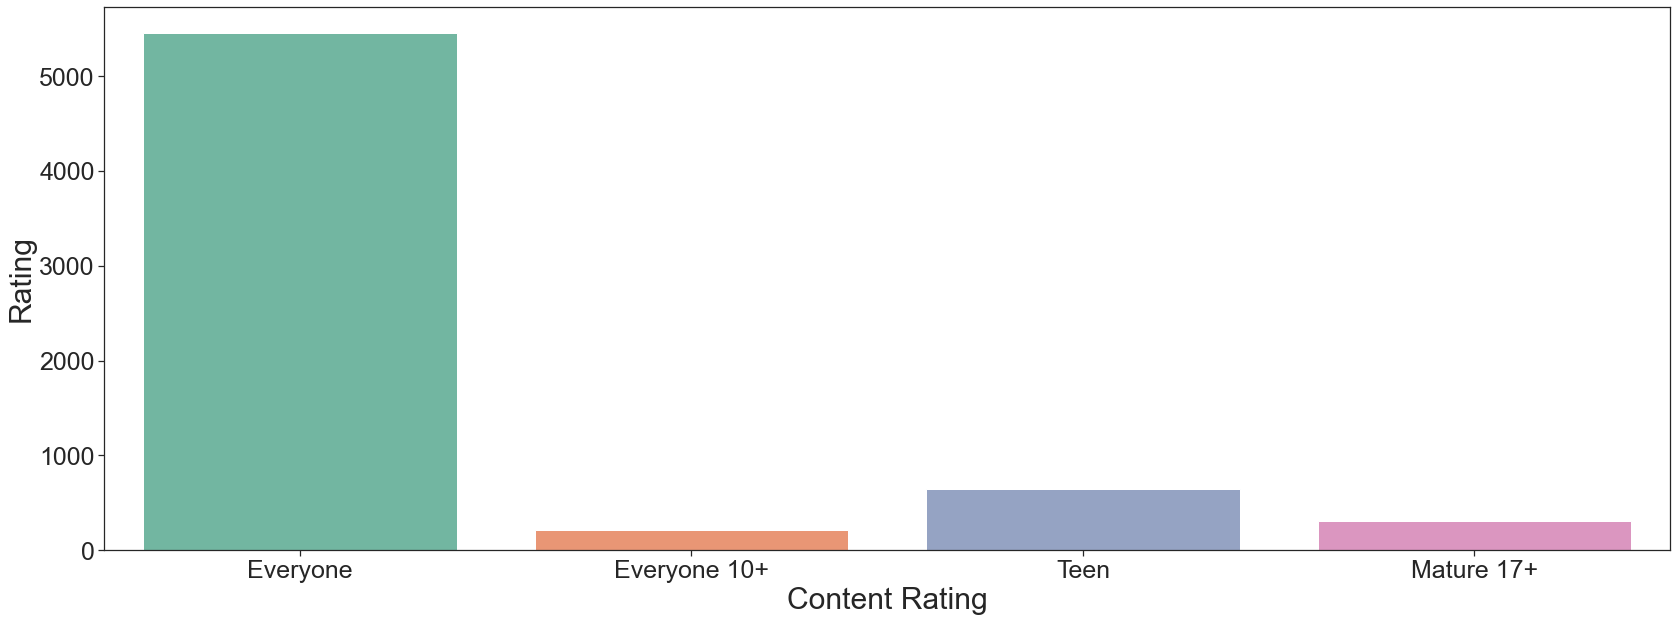

In [56]:
sns.set_theme(style="ticks")
sns.countplot(x="Content Rating",palette='Set2',data=Data)
plt.xlabel("Content Rating",fontsize=(30))
plt.ylabel("Rating",fontsize=(30))
plt.xticks(fontsize=(25))
plt.yticks(fontsize=(25))
plt.show()

# b. Which metric would you use? Mean? Median? Some other quantile?


<AxesSubplot:xlabel='Rating'>

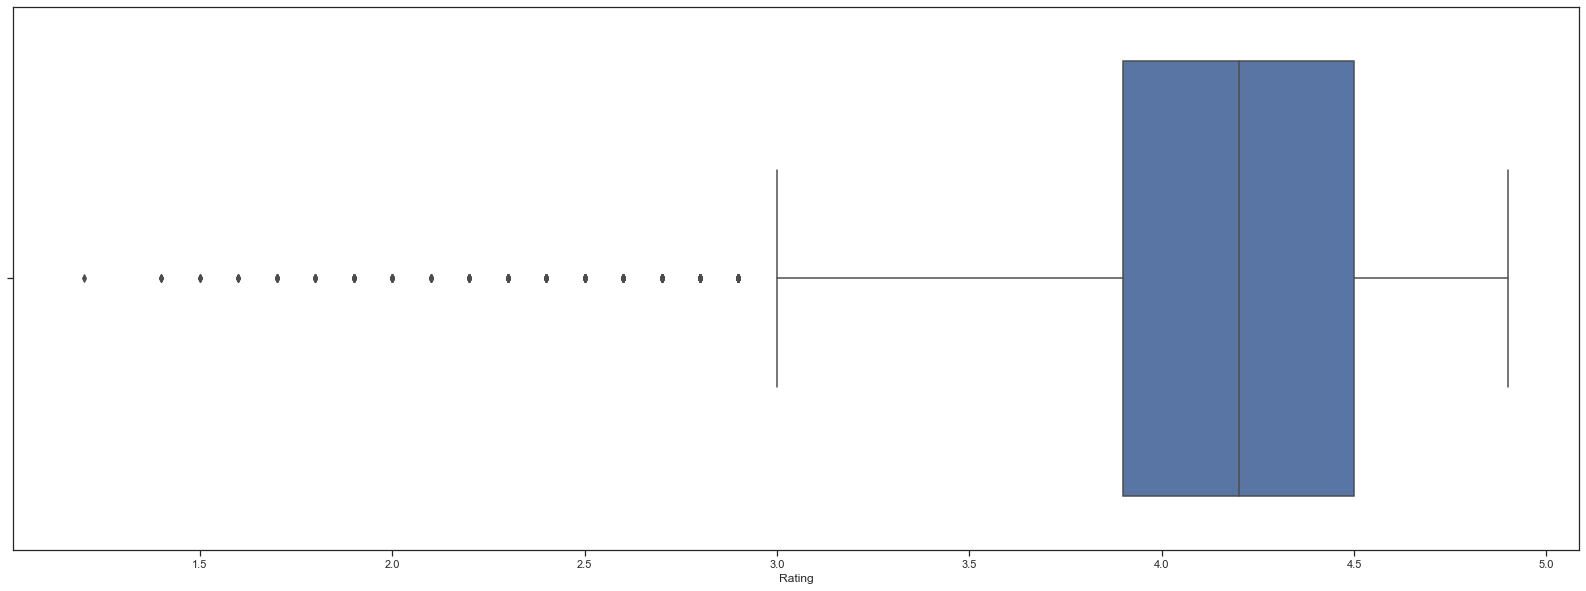

In [57]:
sns.boxplot(Data.Rating)
# We should use median as outliers are there in rating, Because in case of outliers,
# median is the best measure of central tendancy 


# c. Choose the right metric and plot

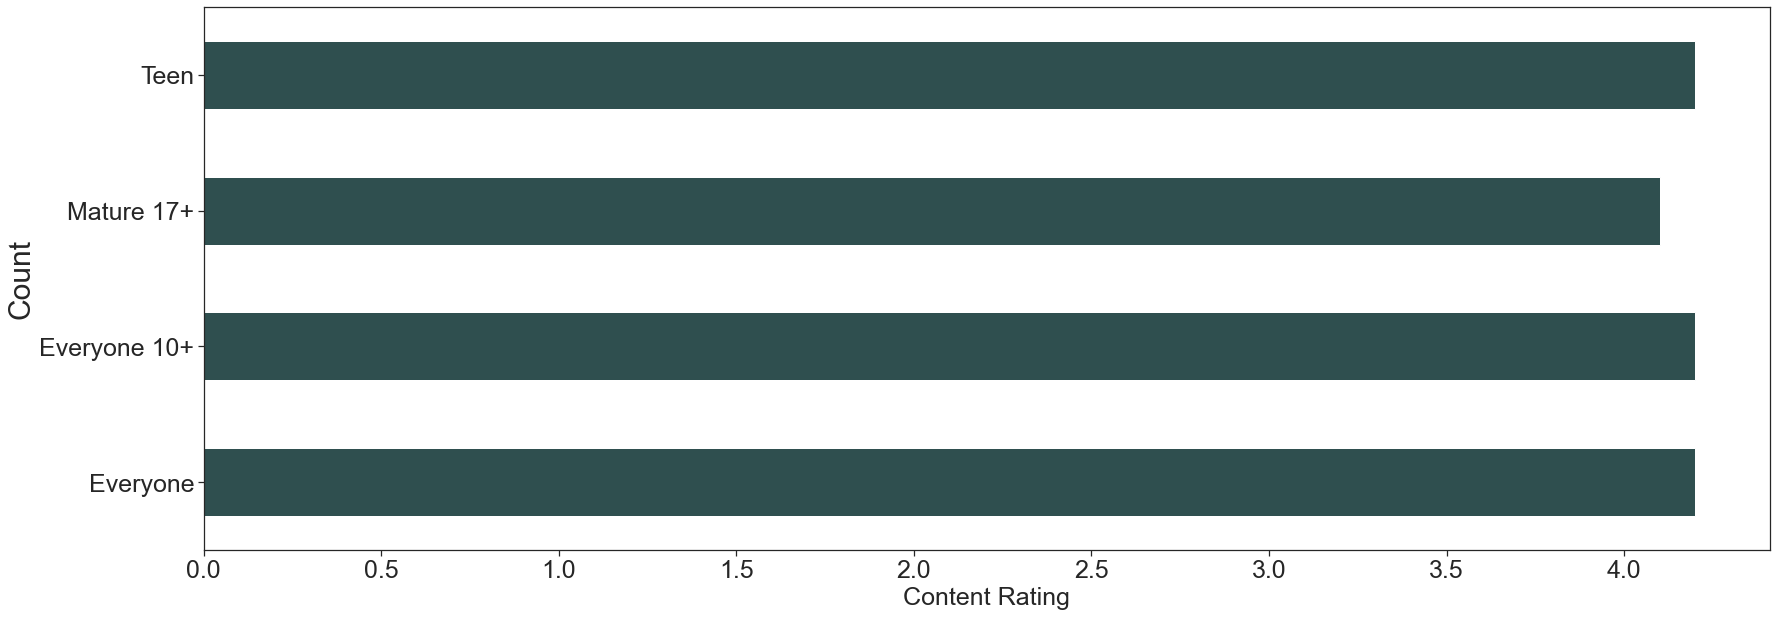

In [58]:
Data.groupby(Data["Content Rating"])["Rating"].median().plot.barh(color="darkslategray")
plt.xlabel("Content Rating",fontsize=(25))
plt.ylabel("Count",fontsize=(30))
plt.xticks(fontsize=(25))
plt.yticks(fontsize=(25))
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time
a. Create 5 buckets (20% records in each) based on Size


In [59]:
Bins=[0,20000,40000,60000,80000,100000]
Data["size"]=pd.cut(Data["Size"],bins=Bins,labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])

In [60]:
pd.pivot_table(Data,values='Rating',index='size',columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
size,,,,
0-20k,4.094166,4.181159,3.946154,4.117000
20k-40k,4.133762,4.089011,4.117647,4.110000
40k-60k,4.119730,4.218182,4.173529,4.185714
60k-80k,4.138889,4.250000,4.100000,4.234783
80k-100k,4.169444,4.192308,4.200000,4.195122


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination


In [61]:
comparison=pd.pivot_table(Data,values='Rating',index='size',columns='Content Rating',
                          aggfunc=lambda x:np.quantile(x,0.2))
comparison

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
size,,,,
0-20k,3.80,4.00,3.5,3.80
20k-40k,3.80,3.80,3.9,3.80
40k-60k,3.80,4.00,4.1,3.98
60k-80k,3.80,3.98,3.9,3.90
80k-100k,3.84,3.88,4.0,3.90


# c. Make a heatmap of this
i. Annotated
ii. Greens color map


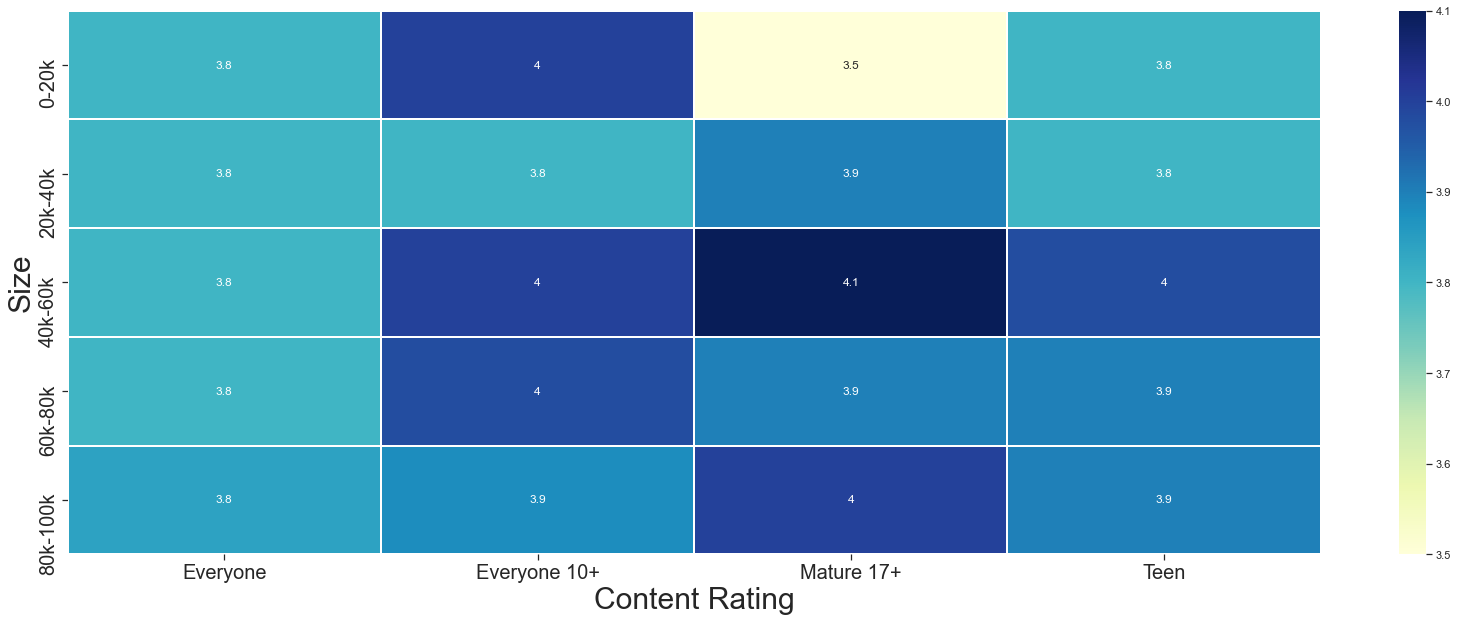

In [62]:
sns.heatmap(comparison,annot=True,cmap="YlGnBu",linewidths=1,fmt='.2g')
plt.xlabel("Content Rating",fontsize=(30))
plt.ylabel("Size",fontsize=(30))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

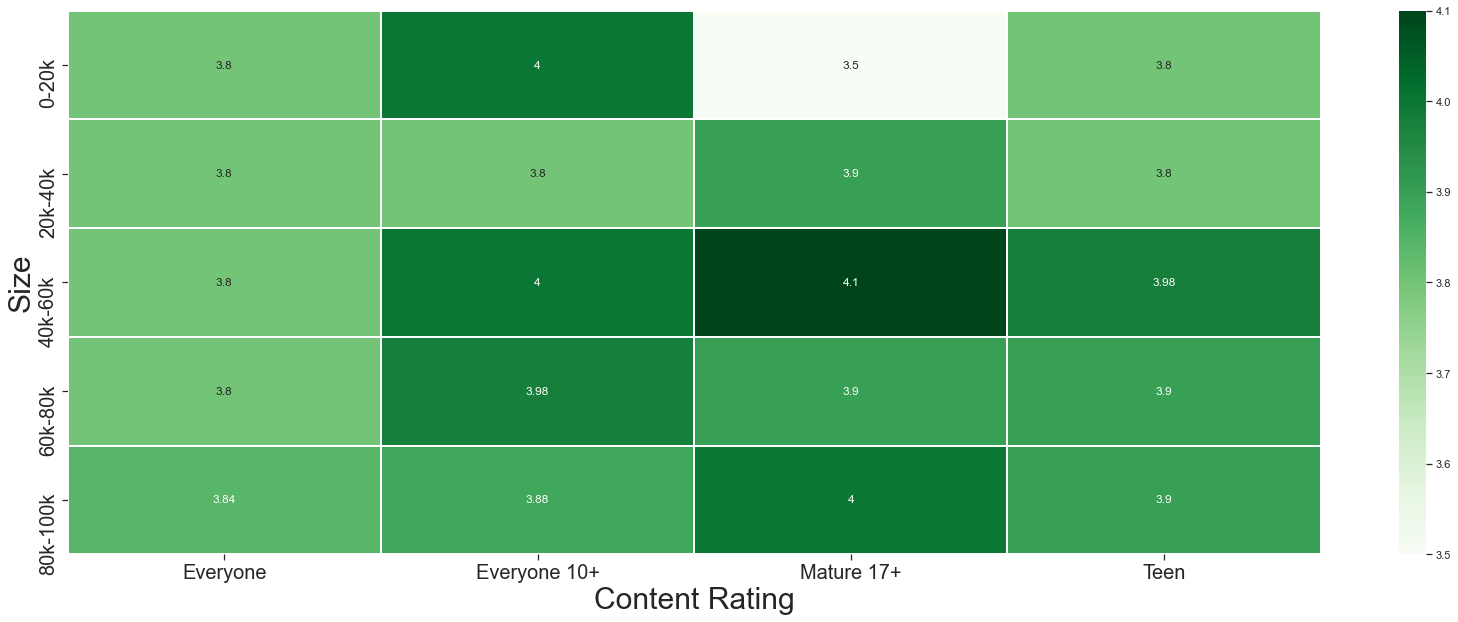

In [63]:
sns.heatmap(comparison,annot=True,cmap="Greens",linewidths=1,fmt='.10g')
plt.xlabel("Content Rating",fontsize=(30))
plt.ylabel("Size",fontsize=(30))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [64]:
# No,Lighter apps are not preferred in all categories,
#Because apps in the range '60k-80k' and '80k and 100k' have got the highest rating in all categories.
#Hence we can conclude that heavier apps are preffered more.